# Ejemplo 1.1 de las notas de Anguiano
**Autor:** Josué Tago Pacheco, Facultad de Ingeniería, UNAM

Licensed under <a href="https://creativecommons.org/licenses/by-nc-nd/4.0?ref=chooser-v1">Attribution-NonCommercial-NoDerivatives 4.0 International</a>

## Ejemplo 1.1

Aproximar $f(t)=\cos\left(\frac{\pi}{2}t\right)$ con un polinomio que coincida en $\{-1,0,1\}$

## Solución

Se importan las bibliotecas de Python
* *numpy* : Permite crear y gestionar arreglos multidimensionales, junto con una gran colección de funciones matemáticas de alto nivel que operan sobre estos arreglos. El sitio oficial es https://numpy.org/
* *matplotlib* : Permite crear visualizaciones estáticas, animadas e interactivas en 2D y 3D. El sitio oficial es https://matplotlib.org/


In [1]:
import numpy as np
import matplotlib.pyplot as plt

Se construyen los arreglos de numpy que se van a graficar

In [3]:
# Vector de numpy de la variable independiente
t = np.linspace(-1, 1, 100)
# Vector de numpy con la evaluación de la función que se quiere aproximar
f = np.cos(np.pi/2*t)

Se grafica la función que se quiere aproximar

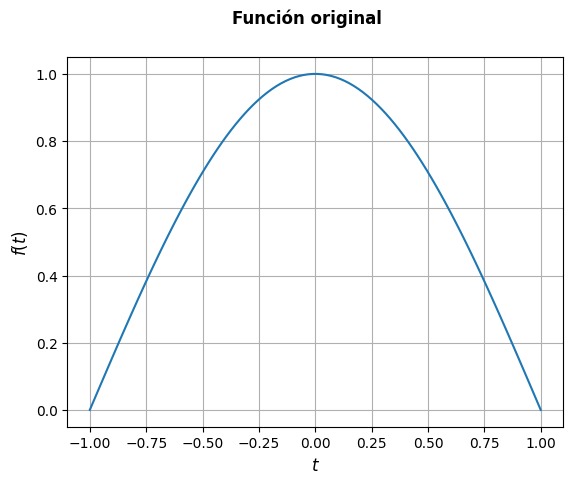

In [13]:
# Se crea la figura
fig = plt.figure()

# Se grafica el vector de la función con respecto al vector de la variable independiente
plt.plot(t, f)

# Se edita la figura
plt.xlabel('$t$',fontsize=12) # Se escribe la etiqueta del eje de la variable indpendiente en tamaño de letra 12
plt.ylabel('$f(t)$',fontsize=12) # Se escribe la etiqueta del eje de la función en tamaño de letra 12
plt.suptitle('Función original', weight='bold') # Se escribe el título de la gráfica 
plt.grid() # Se grafica la cuadrícula

# Se muestra la figura
plt.show()

Como se solicita que la *función aproximada* coincida en **3 puntos** con la *función original*, se tiene que trabajar con un **polinomio de segundo orden** 
$$
f_a(t)=a_0+a_1t+a_2t^2
$$ 
para construir un **sistema algebraico cuadrado** que pueda resolverse.<br><br>
**NOTA**: *Si se eligiera un polinomio de menor orden, se tendría un sistema algebraico sobredeterminado. Por el contrario, si se eligiera un polinomio de orden mayor, se tendría un sistema algebraico subdeterminado.*<br><br>
El sistema matricial se construye al evaluar la *función original* en los puntos solicitados y hacerlos **coincidir** con la evaluación de la *función aproximada*
$$
\begin{align}
\cos(-\frac{\pi}{2}) && = && f_a(-1) && = && a_0 &&-&& a_1 &&+&& a_2 \\
\cos(0) && = && f_a(0) && = && a_0 \\
\cos(\frac{\pi}{2}) && = && f_a(1) && = && a_0 &&+&& a_1 &&+&& a_2
\end{align}
$$


Evaluamos

In [20]:
# - La matriz
M = np.array([ [1,-1,1] , [1,0,0] , [1,1,1]])
M

array([[ 1, -1,  1],
       [ 1,  0,  0],
       [ 1,  1,  1]])

In [21]:
# - El vector independiente
rhs = np.array([np.cos(-np.pi/2),np.cos(0),np.cos(np.pi/2)])
rhs

array([6.123234e-17, 1.000000e+00, 6.123234e-17])

Resolvemos el sistema matricial para encontrar los coeficientes de la función aproximada con las siguientes funciones de **numpy**<br>
* *matmul* : Regresa el producto de dos arreglos de numpy
* *linalg.inv* : Calcula la inversa de un arreglo bidimensional de numpy
* *transpose* : Regresa el transpuesto de un arreglo de numpy

In [34]:
coef = np.matmul(np.linalg.inv(M),np.transpose(rhs))
coef

array([ 1.,  0., -1.])

Evaluamos el polinomio de segundo orden en el intervalo $[-1,1]$<br><br>
**NOTA**: Se requiere invertir el orden del vector con los coeficientes con *flipud* porque la función *polyval* requiere que esten ordenados del grado mayor a la constante.

In [35]:
fa = np.polyval(np.flipud(coef),t)

Graficamos la función original y la aproximada

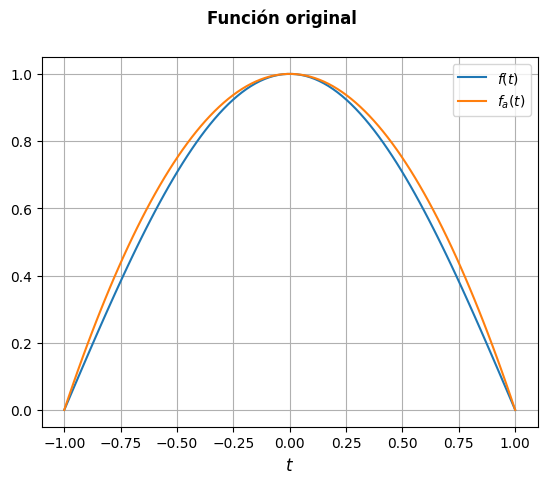

In [39]:
# Se crea la figura
fig = plt.figure()

# Se grafica el vector de la función original con respecto al vector de la variable independiente
plt.plot(t, f, label = '$f(t)$')
# Se grafica el vector de la función aproximada con respecto al vector de la variable independiente
plt.plot(t, fa, label = '$f_a(t)$')

# Se edita la figura
plt.xlabel('$t$',fontsize=12) # Se escribe la etiqueta del eje de la variable indpendiente en tamaño de letra 12
plt.suptitle('Función original', weight='bold') # Se escribe el título de la gráfica 
plt.grid() # Se grafica la cuadrícula
plt.legend() # Se imprime la leyenda

# Se muestra la figura
plt.show()